# BATTLE OF THE NEIGHBORHOODS
###  Where to Live in America? A Comparison of Cost, Food, and Serial Killers

## 1. INTRODUCTION

The United States covers 3.797 million square miles across North America.  As of 2020, there is an estimated 331.3 million people living within its 50 states.  Each of the 50 states has its own unique characteristics.  Some states, like New York, are home to booming metropolitan areas.  Some hold beautiful vast national parks, like Arizona.  Others still have the quiet rustic farmlands, like Oklahoma.  Some states, such as California, contain a bit of everything.

Deciding where to move can be difficult.  There are various factors to consider; jobs, housing, schools, etc.  For this capstone project, I will dive into three:

* Cost of living
* Variety of food choices available
* The likelihood of coming face to face with a serial killer

Yes, those are three very different factors for one to consider.  However, together, I believe they can make a more compelling case for states that do not receive as much attention.  

My target audience is people looking for an inexpensive state to live, with a lot of food options, and do not want to face off with a serial killer!

## 2. DATA

For my analysis, I will be using three data sources:

* Foursquare
* developers.google.com
* worldpopulationreview.com

__2.1 Foursquare__

https://developer.foursquare.com/docs/

Utilizing the Foursquare API, I will obtain a samples different types of food venues available per state.  I will then analyze and compare each state to determine the level of diversity.  For example, if one state has 6 types of food venues in the sample of 10, they are more diverse than a state that only has 7 types of food venues in the sample of 20.

https://developer.foursquare.com/docs/build-with-foursquare/categories/

I will also use the Category Hierarchy provided by Foursquare to specify food-related venues (e.g. restaurants, fast food, etc).

__2.2 developers.google.com__

https://developers.google.com/public-data/docs/canonical/states_csv

I will use the latitudes and longitudes for each state provided here in conjunction with the Foursquare API.

__2.2 worldpopulationreview.com (Cost of Living by State)__

https://worldpopulationreview.com/states/cost-of-living-index-by-state/

There are various types of cost of living indexes that use different variables and metrics.  Most indexes set 100 as the national average cost of living.  This is a widely accepted average as a basis for comparison.

I will utilize the general cost of living index provided by worldpopulationreview.com in order to compare the 50 states and Washington D.C.  Per their calculations, each state falls on a range between 86 and 193.  Virginia, for example, is a 100.7, which is right about the national average.

This data also contains other more specific cost of living measurements, such as utilities and transportation.  However, I will not be analyzing those variables in this project.

__2.3 worldpopulationreview.com (Serial Killers by State)__

https://worldpopulationreview.com/states/serial-killers-by-state/

This data contains the number of (known) serial killer victims in each state.  It also contains the total population of each state (as of 2020).  Based on the information provided, I will calculate the probability of encountering a serial killer in every state.  For example, Virginia has 238 confirmed serial killer victims and a population of 8,626,207.  Therefore, if you live in that state, you have a 0.0028% chance of a serial killer encounter.

## 3. Methodolgy

__3.1 Cost of Living__

Here is a ranking of the 50 states and Washington DC, from lowest to highest cost of living.

In [2]:
!conda install -c anaconda xlrd --yes
!conda update -n base -c defaults conda --yes
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xlrd-1.2.0                 |             py_0         108 KB  anaconda
    certifi-2019.11.28         |           py36_1         157 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0        --> 2020.1.1-0        anaconda
    certifi:         2019.11.28-py36_0 --> 2019.11.28-py36_1 anaconda
    openssl:         1.1.1e-h7b6447c_0 --> 1.1.1-h7b6447c_0  anaconda
    xlrd:            1.2.0-py_0       

In [3]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
from pandas.io.json import json_normalize
from pprint import pprint

from geopy.geocoders import Nominatim

import folium

import matplotlib.cm as cm
import matplotlib.colors as colors

from collections import Counter

from sklearn.cluster import KMeans

import requests

print('Libraries imported.')

Libraries imported.


In [4]:
cost = pd.read_csv('https://raw.githubusercontent.com/joannlin87/Coursera_Capstone/master/Cost-of-Living.csv')
cost = cost.rename({'costIndex':'Cost_Index'}, axis=1)
cost = cost.drop(columns='costRank')
#cost = cost.set_index('State')
cost

,State,Cost_Index
0,Mississippi,86.1
1,Arkansas,86.9
2,Oklahoma,87.0
3,Missouri,87.1
4,New Mexico,87.5
5,Tennessee,88.7
6,Michigan,88.9
7,Kansas,89.0
8,Georgia,89.2
9,Alabama,89.3


Here is a bar chart for a better visual comparison.

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

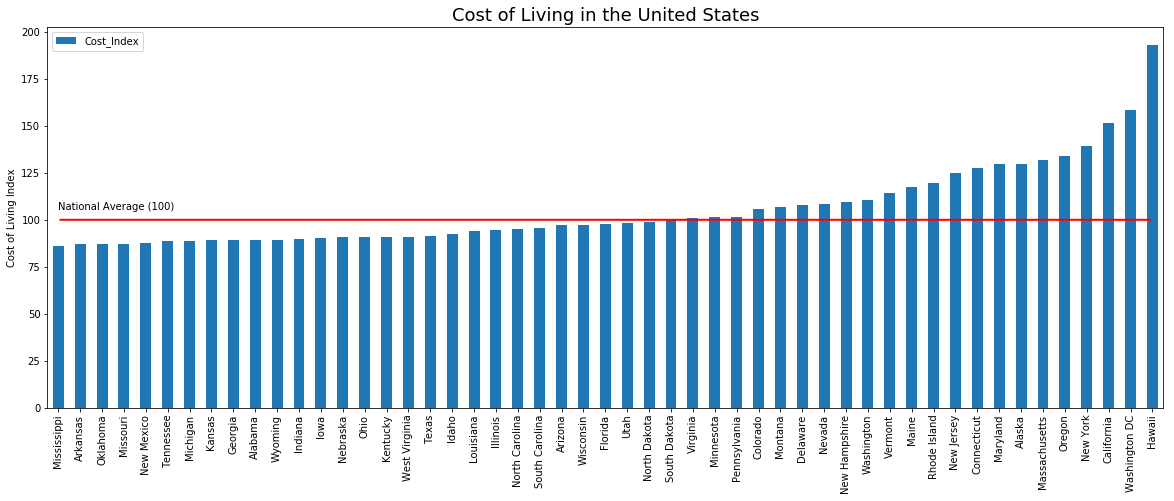

In [6]:
cost.plot(kind='bar',figsize=(20,7))
plt.xticks(cost.index,cost["State"].values)
plt.title('Cost of Living in the United States',fontsize=18)
plt.xlabel('')
plt.ylabel('Cost of Living Index')

# Annotate arrow
plt.annotate('',                      
             xy=(50, 100),             
             xytext=(0, 100),         
             xycoords='data',         
             arrowprops=dict(arrowstyle='-', connectionstyle='arc3', color='red', lw=2)
            )

# Annotate Text
plt.annotate('National Average (100)', 
             xy=(0, 104),                    
             rotation=0,                 
             va='bottom',                    
             ha='left',                      
            )

plt.show()

__3.2 Food Variety__

I will take a sample of 50 restaurants from each state and analyze the variety available.

First I will take the coordinates of all 50 states and Washington DC.

In [7]:
usa_coord = pd.read_csv('https://raw.githubusercontent.com/joannlin87/Coursera_Capstone/master/USA-Coord.csv')
usa_coord = usa_coord.drop(columns='state')
usa_coord = usa_coord.rename({'latitude':'Latitude','longitude':'Longitude','name':'State'}, axis=1)
#usa_coord = usa_coord.set_index('State')
usa_coord.head()

,Latitude,Longitude,State
0,63.588753,-154.493062,Alaska
1,32.318231,-86.902298,Alabama
2,35.201050,-91.831833,Arkansas
3,34.048928,-111.093731,Arizona
4,36.778261,-119.417932,California


In [8]:
usa_coord.dtypes

Latitude     float64
Longitude    float64
State         object
dtype: object

In [9]:
map_usa = folium.Map(location=[37.0902, -95.7129], zoom_start=3)

# add markers to map
for state, lat, lng in zip(usa_coord['State'], usa_coord['Latitude'], usa_coord['Longitude']):
    label = '{}'.format(state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_usa)  
    
map_usa

Now I will retrieve food venues information from Foursquare.

In [123]:
CLIENT_ID = 'xxx'
CLIENT_SECRET = 'xxx'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xxx
CLIENT_SECRET:xxx


In [12]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
get_category = requests.get(url).json()

In [13]:
all_category = get_category['response']['categories']

In [14]:
def flatten_Hierarchy(all_category, checkParentID, food_venue, parent_id = ''):
    for data in all_category:
        
        if checkParentID == True and data['id'] == parent_id:
            food_venue[data['id']] = data['name']
            flatten_Hierarchy(all_category = data['categories'], checkParentID = False, food_venue = food_venue)
        
        elif checkParentID == False:
            food_venue[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(all_category = data['categories'], checkParentID = False, food_venue = food_venue)
    
    return food_venue

In [15]:
food_venue = flatten_Hierarchy(all_category, checkParentID=True, food_venue = {}, parent_id = '4d4b7105d754a06374d81259')

I will first obtain one food venue in New York in order to test the Foursquare API and examine the results.

In [19]:
usa_coord_latitude = usa_coord.loc[34, 'Latitude']
usa_coord_longitude = usa_coord.loc[34, 'Longitude']

usa_coord_state = usa_coord.loc[34, 'State']

print('The coordinates of {} are {} and {}.'.format(usa_coord_state, 
                                                               usa_coord_latitude, 
                                                               usa_coord_longitude))

The coordinates of New York are 43.299428000000006 and -74.217933.


In [124]:
LIMIT = 1
radius = 10000
categoryId = '4d4b7105d754a06374d81259'

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    usa_coord_latitude, 
    usa_coord_longitude, 
    radius,
    categoryId,
    LIMIT)

In [23]:
results = requests.get(url).json()
results['response']['venues']

[{'id': '4cb716167abcbfb75710a71f',
  'name': "Stewart's Shops",
  'location': {'address': '111 S Main St',
   'lat': 43.22507466872335,
   'lng': -74.17129224325025,
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.22507466872335,
     'lng': -74.17129224325025}],
   'distance': 9099,
   'postalCode': '12134',
   'cc': 'US',
   'city': 'Northville',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['111 S Main St',
    'Northville, NY 12134',
    'United States']},
  'categories': [{'id': '4d954b0ea243a5684a65b473',
    'name': 'Convenience Store',
    'pluralName': 'Convenience Stores',
    'shortName': 'Convenience Store',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_',
     'suffix': '.png'},
    'primary': True}],
  'venuePage': {'id': '542387710'},
  'referralId': 'v-1586024324',
  'hasPerk': False}]

The test resulted in a food venue return of "Convenience Stores".  This data is what I am looking for in each state, so I will proceed with the remaining states.  Using the coordinates and Foursquare data, obtain food venues in each state and Washington DC.  In order to capture more area of a state, I will set the radius at 5000.

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000, LIMIT=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259",
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['State', 
                  'State Latitude', 
                  'State Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
usa_venues = getNearbyVenues(names=usa_coord['State'],
                                   latitudes=usa_coord['Latitude'],
                                   longitudes=usa_coord['Longitude']
                                  )

Alaska
Alabama
Arkansas
Arizona
California
Colorado
Connecticut
Washington DC
Delaware
Florida
Georgia
Hawaii
Iowa
Idaho
Illinois
Indiana
Kansas
Kentucky
Louisiana
Massachusetts
Maryland
Maine
Michigan
Minnesota
Missouri
Mississippi
Montana
North Carolina
North Dakota
Nebraska
New Hampshire
New Jersey
New Mexico
Nevada
New York
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Virginia
Vermont
Washington
Wisconsin
West Virginia
Wyoming


In [26]:
print(usa_venues.shape)
usa_venues.head(20)

(517, 7)


,State,State Latitude,State Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alaska,63.588753,-154.493062,Princess Theatre,63.588757,-154.493064,American Restaurant
1,Alaska,63.588753,-154.493062,Trident Grill,63.582062,-154.476957,Burger Joint
2,Alabama,32.318231,-86.902298,Charliey's Grilled Subs,32.318231,-86.902298,Fast Food Restaurant
3,Arkansas,35.201050,-91.831833,ظ,35.201050,-91.831833,German Restaurant
4,Arizona,34.048928,-111.093731,Preston Main Mango Tree,34.048928,-111.093731,Food Court
5,Arizona,34.048928,-111.093731,Graziano's Pizzeria,34.048928,-111.093731,Pizza Place
6,Arizona,34.048928,-111.093731,Pete:s Fish In Chip,34.048927,-111.093735,Fast Food Restaurant
7,Arizona,34.048928,-111.093731,Mdonalds,34.048927,-111.093735,Burger Joint
8,Arizona,34.048928,-111.093731,Four Seasons Hotel “ Restaurant Zafferano“,34.048928,-111.093731,Restaurant
9,Arizona,34.048928,-111.093731,Tortilla Lady,34.049077,-111.095808,Taco Place


Now let's examine the different types of food venues.

In [27]:
print('There are {} uniques categories.'.format(len(usa_venues['Venue Category'].unique())))
usa_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 68 uniques categories.


Venue Category
Pizza Place                        57
American Restaurant                51
Fast Food Restaurant               31
Sandwich Place                     30
Donut Shop                         20
Restaurant                         20
Italian Restaurant                 19
Café                               18
Mexican Restaurant                 18
Bakery                             15
Seafood Restaurant                 15
Chinese Restaurant                 14
Breakfast Spot                     13
Diner                              12
Burger Joint                       11
Steakhouse                         11
BBQ Joint                          11
Food                               10
Food Truck                          9
New American Restaurant             8
Deli / Bodega                       8
Indian Restaurant                   8
Mediterranean Restaurant            7
Japanese Restaurant                 7
Asian Restaurant                    7
Bagel Shop                         

There are some general venue types (e.g. Food), which does not provide insight to the type of food it serves.  Therefore, I will manually identify and remove those types.

In [32]:
unique_categories = usa_venues['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))

American Restaurant, Burger Joint, Fast Food Restaurant, German Restaurant, Pizza Place, Taco Place, Fried Chicken Joint, Food Truck, Seafood Restaurant, BBQ Joint, Mexican Restaurant, Italian Restaurant, Deli / Bodega, Japanese Restaurant, Bagel Shop, Breakfast Spot, Chinese Restaurant, Hot Dog Joint, Sandwich Place, Donut Shop, Café, Diner, Asian Restaurant, Bakery, Arepa Restaurant, Spanish Restaurant, French Restaurant, Latin American Restaurant, Gastropub, Thai Restaurant, Eastern European Restaurant, Sushi Restaurant, Steakhouse, Greek Restaurant, Israeli Restaurant, New American Restaurant, Mediterranean Restaurant, Salad Place, Poke Place, Falafel Restaurant, Peruvian Restaurant, Indian Restaurant, Vegetarian / Vegan Restaurant, Portuguese Restaurant, Cantonese Restaurant, South American Restaurant, Tapas Restaurant, Middle Eastern Restaurant, Ethiopian Restaurant, Southern / Soul Food Restaurant, Brazilian Restaurant, Ramen Restaurant, Wings Joint, Turkish Restaurant, Mongolia

In [33]:
general_categories = ['Food','Restaurant','Food Court','Snack Place','Truck Stop','Cafeteria','Food Stand']

In [34]:
food_categories =  list(set(unique_categories) - set(general_categories))
print(', '.join(str(x) for x in food_categories))

Donut Shop, Ethiopian Restaurant, Cantonese Restaurant, Mongolian Restaurant, Burger Joint, Peruvian Restaurant, French Restaurant, Steakhouse, Noodle House, Southern / Soul Food Restaurant, Sushi Restaurant, Fish & Chips Shop, Wings Joint, Falafel Restaurant, Italian Restaurant, Breakfast Spot, Bakery, Asian Restaurant, Chinese Restaurant, South American Restaurant, Brazilian Restaurant, Fast Food Restaurant, Tapas Restaurant, Indian Restaurant, Fried Chicken Joint, New American Restaurant, Portuguese Restaurant, Salad Place, Latin American Restaurant, Spanish Restaurant, Pizza Place, Gastropub, Eastern European Restaurant, Greek Restaurant, Israeli Restaurant, Middle Eastern Restaurant, German Restaurant, Taco Place, Burrito Place, Poke Place, Deli / Bodega, American Restaurant, Hot Dog Joint, Food Truck, Mediterranean Restaurant, BBQ Joint, Bagel Shop, Sandwich Place, Ramen Restaurant, Irish Pub, Comfort Food Restaurant, Vegetarian / Vegan Restaurant, Seafood Restaurant, Café, Diner

In [35]:
usa_venues = usa_venues[usa_venues['Venue Category'].isin(food_categories)]
#usa_venues = usa_venues.drop(columns='index')
usa_venues.head()

,State,State Latitude,State Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alaska,63.588753,-154.493062,Princess Theatre,63.588757,-154.493064,American Restaurant
1,Alaska,63.588753,-154.493062,Trident Grill,63.582062,-154.476957,Burger Joint
2,Alabama,32.318231,-86.902298,Charliey's Grilled Subs,32.318231,-86.902298,Fast Food Restaurant
3,Arkansas,35.201050,-91.831833,ظ,35.201050,-91.831833,German Restaurant
5,Arizona,34.048928,-111.093731,Graziano's Pizzeria,34.048928,-111.093731,Pizza Place


Now that I have the sample of food venues (minus generic food venues) for each state and Washington DC, I will remove any duplicate venue types for each state.

In [36]:
usa_venues.sort_values('State').drop_duplicates(subset=['Venue Category', 'State'], keep='last')
usa_venues.head(10)

,State,State Latitude,State Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alaska,63.588753,-154.493062,Princess Theatre,63.588757,-154.493064,American Restaurant
1,Alaska,63.588753,-154.493062,Trident Grill,63.582062,-154.476957,Burger Joint
2,Alabama,32.318231,-86.902298,Charliey's Grilled Subs,32.318231,-86.902298,Fast Food Restaurant
3,Arkansas,35.201050,-91.831833,ظ,35.201050,-91.831833,German Restaurant
5,Arizona,34.048928,-111.093731,Graziano's Pizzeria,34.048928,-111.093731,Pizza Place
6,Arizona,34.048928,-111.093731,Pete:s Fish In Chip,34.048927,-111.093735,Fast Food Restaurant
7,Arizona,34.048928,-111.093731,Mdonalds,34.048927,-111.093735,Burger Joint
9,Arizona,34.048928,-111.093731,Tortilla Lady,34.049077,-111.095808,Taco Place
10,Arizona,34.048928,-111.093731,Chester's Fried Chicken,34.056408,-111.089401,Fried Chicken Joint
11,California,36.778261,-119.417932,McDonald's,36.776593,-119.418501,Fast Food Restaurant


I am left with the unique food venues in each state out of my sample.

Now I will count how many unique food venues there are in each state.

In [119]:
usa_food_count = pd.DataFrame(usa_venues.State.value_counts().reset_index().values, columns=["State", "Unique_Food_Venues"])
usa_food_count.head()

,State,Unique_Food_Venues
0,Washington DC,97
1,Maryland,59
2,New Hampshire,52
3,Rhode Island,52
4,Connecticut,51


Here is the above data in a bar chart for visualization.

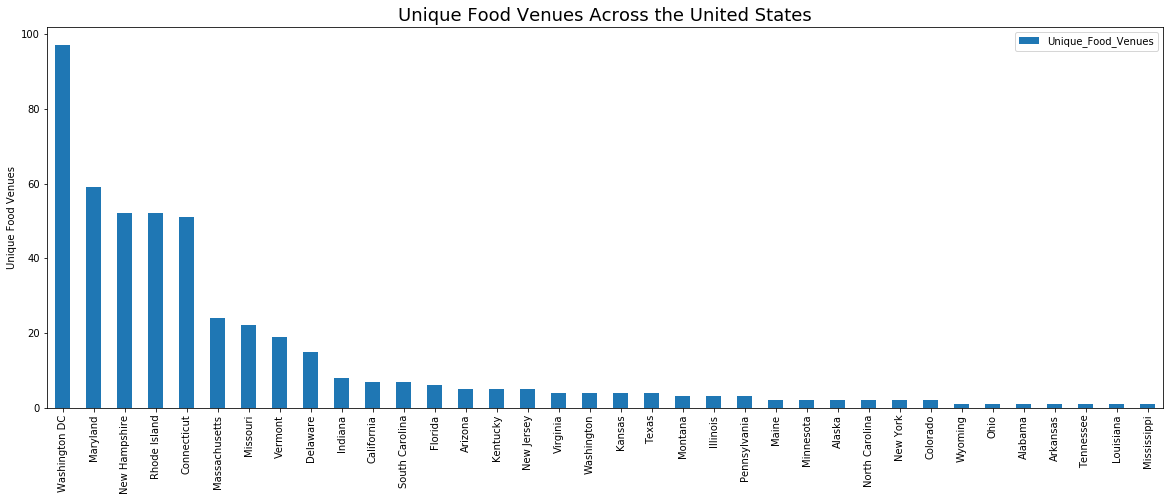

In [38]:
usa_food_count.plot(kind='bar',figsize=(20,7))
plt.xticks(usa_food_count.index,usa_food_count["State"].values)
plt.title('Unique Food Venues Across the United States',fontsize=18)
plt.xlabel('')
plt.ylabel('Unique Food Venues')

plt.show()

__3.3 Serial Killers__

Now I will examine the number of serial killer victims per state.

In [39]:
serial = pd.read_csv('https://raw.githubusercontent.com/joannlin87/Coursera_Capstone/master/Serial-Killers.csv')
serial

,State,Victims,Population,Probability
0,Washington DC,170,720687,0.00024
1,Alaska,51,734002,0.00007
2,Louisiana,300,4645184,0.00006
3,Kansas,153,2910357,0.00005
4,Indiana,341,6745354,0.00005
5,Missouri,311,6169270,0.00005
6,Washington,390,7797095,0.00005
7,Illinois,629,12659682,0.00005
8,Oklahoma,195,3954821,0.00005
9,Wyoming,27,567025,0.00005


In [40]:
serial.dtypes

State           object
Victims          int64
Population       int64
Probability    float64
dtype: object

There are several numbers to consider.  First, I will look at the highest victim count.

In [41]:
serial_vic = serial.sort_values('Victims',ascending=False)
serial_vic.head()

,State,Victims,Population,Probability
10,California,1628,39937489,0.00004
27,Texas,893,29472295,0.00003
13,Florida,845,21992985,0.00004
7,Illinois,629,12659682,0.00005
23,New York,628,19440469,0.00003


We can see the top 5 states with the highest victim count.  However, those states do have a higher population, so it is expected that they would have more victims.

The probability in relation to the total population may be a better indicator.

In [42]:
serial_prob = serial.sort_values('Probability',ascending=False)
serial_prob.head()

,State,Victims,Population,Probability
0,Washington DC,170,720687,0.00024
1,Alaska,51,734002,0.00007
2,Louisiana,300,4645184,0.00006
3,Kansas,153,2910357,0.00005
4,Indiana,341,6745354,0.00005


Here is the probability in a bar chart for visualization.

In [43]:
serial_prob_only = serial_prob.drop(columns=['Victims','Population'],axis=1)
serial_prob_only.head()

,State,Probability
0,Washington DC,0.00024
1,Alaska,0.00007
2,Louisiana,0.00006
3,Kansas,0.00005
4,Indiana,0.00005


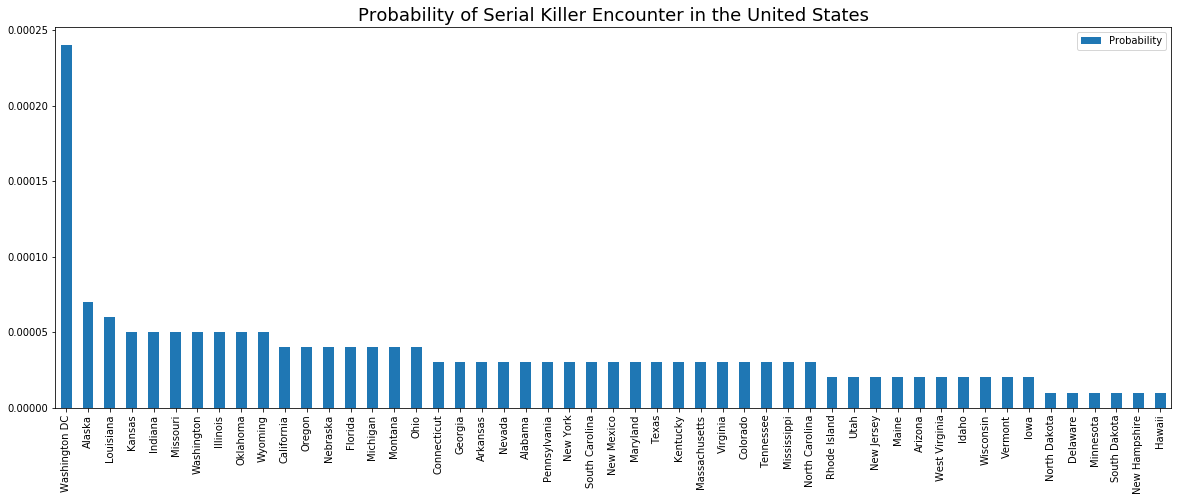

In [174]:
serial_prob_only.plot(kind='bar',figsize=(20,7))
plt.xticks(serial_prob_only.index,serial_prob_only["State"].values)
plt.title('Probability of Serial Killer Encounter in the United States',fontsize=18)
plt.xlabel('')
plt.ylabel('')

plt.show()

## 4. Results

__4.1 10 Highest and Lowest Results__

From the three analysis done above, here are the 10 highest and lowest results of all three variables.

__10 States with the LOWEST cost of living:__

In [44]:
cost = cost.sort_values('Cost_Index',ascending=True)
cost.head(10)

,State,Cost_Index
0,Mississippi,86.1
1,Arkansas,86.9
2,Oklahoma,87.0
3,Missouri,87.1
4,New Mexico,87.5
5,Tennessee,88.7
6,Michigan,88.9
7,Kansas,89.0
8,Georgia,89.2
9,Alabama,89.3


__10 States (+ Washington DC) with the HIGHEST cost of living:__

In [46]:
cost = cost.sort_values('Cost_Index',ascending=False)
cost.head(10)

,State,Cost_Index
50,Hawaii,192.9
49,Washington DC,158.4
48,California,151.7
47,New York,139.1
46,Oregon,134.2
45,Massachusetts,131.6
44,Alaska,129.9
43,Maryland,129.7
42,Connecticut,127.7
41,New Jersey,125.1


We can see that Mississippi has the lowest cost of living at 86.1 compared to the national average of 100, while Hawaii by far has the highest at 192.9.

__10 States (+ Washington DC) with the MOST number of unique food venues:__

In [48]:
usa_food_count = usa_food_count.sort_values('Unique_Food_Venues',ascending=False)
usa_food_count.head(10)

,State,Unique_Food_Venues
0,Washington DC,97
1,Maryland,59
2,New Hampshire,52
3,Rhode Island,52
4,Connecticut,51
5,Massachusetts,24
6,Missouri,22
7,Vermont,19
8,Delaware,15
9,Indiana,8


__10 States (+ Washington DC) with the LEAST number of unique food venues:__

In [49]:
usa_food_count = usa_food_count.sort_values('Unique_Food_Venues',ascending=True)
usa_food_count.head(10)

,State,Unique_Food_Venues
35,Mississippi,1
29,Wyoming,1
30,Ohio,1
34,Louisiana,1
32,Arkansas,1
33,Tennessee,1
31,Alabama,1
23,Maine,2
24,Minnesota,2
27,New York,2


As you can see, there are definitely built in issues with the data.  The smaller states (and Washington DC) have a significantly higher number of unique food venues.  The bigger states have less.  This is due to the radius value.  I set the radius at 5000 in order to capture more area in the states.

For example, New York is a large state.  However, the majority of the population lives in one small area of New York, and therefore, all the available restaurants are centered in that one small area.

Capturing such a large area unfortunately covers too much area for the smaller states, and therefore captures more unique food venues.  Washington DC, being the smallest area, as it is just a city, expectedly shows the highest number of food venues.

We can also see that some states are also missing.  This is because the 5000 radius did not pick up any food venues within the vicinity of the search.

Obviously, this is not a perfect indication of food diversity of each state.  However, it will give us some indication of the availability of each state.  Additionally, the other two variables also factor into the analysis.  For the purpose of this project, I will keep the food venue variable as part of the anaylsis.

__10 States with the LOWEST possibility of encountering a serial killer:__

In [50]:
serial_prob_only = serial_prob_only.sort_values('Probability',ascending=True)
serial_prob_only.head(10)

,State,Probability
50,Hawaii,0.00001
45,North Dakota,0.00001
46,Delaware,0.00001
49,New Hampshire,0.00001
48,South Dakota,0.00001
47,Minnesota,0.00001
44,Iowa,0.00002
42,Wisconsin,0.00002
41,Idaho,0.00002
40,West Virginia,0.00002


__10 States with the HIGHEST possibility of encountering a serial killer:__

In [51]:
serial_prob_only = serial_prob_only.sort_values('Probability',ascending=False)
serial_prob_only.head(10)

,State,Probability
0,Washington DC,0.00024
1,Alaska,0.00007
2,Louisiana,0.00006
3,Kansas,0.00005
4,Indiana,0.00005
5,Missouri,0.00005
6,Washington,0.00005
7,Illinois,0.00005
8,Oklahoma,0.00005
9,Wyoming,0.00005


Now this gets interesting.  People in Hawaii, North Dakota, Delaware, New Hampshire, South Dakota, and Minnesota have the lowest probability of encountering a serial killer at 0.00001%.  On the flip side, people living in Washington DC have the highest probability of encountering a serial killer at 0.00024%.  That is higher than the probability of being dealt a royal flush in poker (which is 0.000154%, according to Wikipedia)!

__4.2 All States (+ Washington DC) and All Results__

I combined all results below.  I'm also replacing all NaN with "0".

In [121]:
usa_cost_food = cost.merge(usa_food_count, on="State", how="left")
usa_cost_food_serial = usa_cost_food.merge(serial_prob_only, on="State", how="left")
usa_cost_food_serial = usa_cost_food_serial.sort_values('Probability',ascending=True)
usa_cost_food_serial['Unique_Food_Venues'] = usa_cost_food_serial['Unique_Food_Venues'].fillna(0)
usa_cost_food_serial.head(10)

,State,Cost_Index,Unique_Food_Venues,Probability
0,Hawaii,192.9,0,0.00001
22,South Dakota,99.8,0,0.00001
20,Minnesota,101.6,2,0.00001
16,Delaware,108.1,15,0.00001
14,New Hampshire,109.7,52,0.00001
23,North Dakota,98.8,0,0.00001
26,Wisconsin,97.3,0,0.00002
27,Arizona,97.0,5,0.00002
32,Idaho,92.3,0,0.00002
11,Maine,117.5,2,0.00002


I will normalize the data in order to better analyze the correlation of the variables.  I will also inverse the numbers for Unique_Food_Venues to match Cost_Index and Probability in that the lower the value, the better.

In [122]:
usa_cost_food_serial['Cost_Index'] = usa_cost_food_serial['Cost_Index']/usa_cost_food_serial['Cost_Index'].max()
usa_cost_food_serial['Unique_Food_Venues'] = 1 - (usa_cost_food_serial['Unique_Food_Venues']/usa_cost_food_serial['Unique_Food_Venues'].max())
usa_cost_food_serial['Probability'] = usa_cost_food_serial['Probability']/usa_cost_food_serial['Probability'].max()
usa_cost_food_serial.head(10)

,State,Cost_Index,Unique_Food_Venues,Probability
0,Hawaii,1.000000,1.000000,0.041667
22,South Dakota,0.517367,1.000000,0.041667
20,Minnesota,0.526698,0.979381,0.041667
16,Delaware,0.560394,0.845361,0.041667
14,New Hampshire,0.568688,0.463918,0.041667
23,North Dakota,0.512182,1.000000,0.041667
26,Wisconsin,0.504406,1.000000,0.083333
27,Arizona,0.502851,0.948454,0.083333
32,Idaho,0.478486,1.000000,0.083333
11,Maine,0.609124,0.979381,0.083333


Now I will add values of the Cost_Index, Unique_Food_Venues, and Probability.  This allows me to combine all three variables in order to compare each state.

In [115]:
total = usa_cost_food_serial['Cost_Index'] + usa_cost_food_serial['Unique_Food_Venues'] + usa_cost_food_serial['Probability']
usa_cost_food_serial_total_only['Total_Score'] = total
usa_cost_food_serial_total_only = usa_cost_food_serial_total_only.set_index('State')
usa_cost_food_serial_total_only

,Total_Score
State,
New Hampshire,1.074273
Rhode Island,1.166224
Maryland,1.189122
Connecticut,1.261228
Missouri,1.433058
Delaware,1.447421
Vermont,1.481029
Arizona,1.534638
Kentucky,1.544682


Here is the bar chart of the final result.

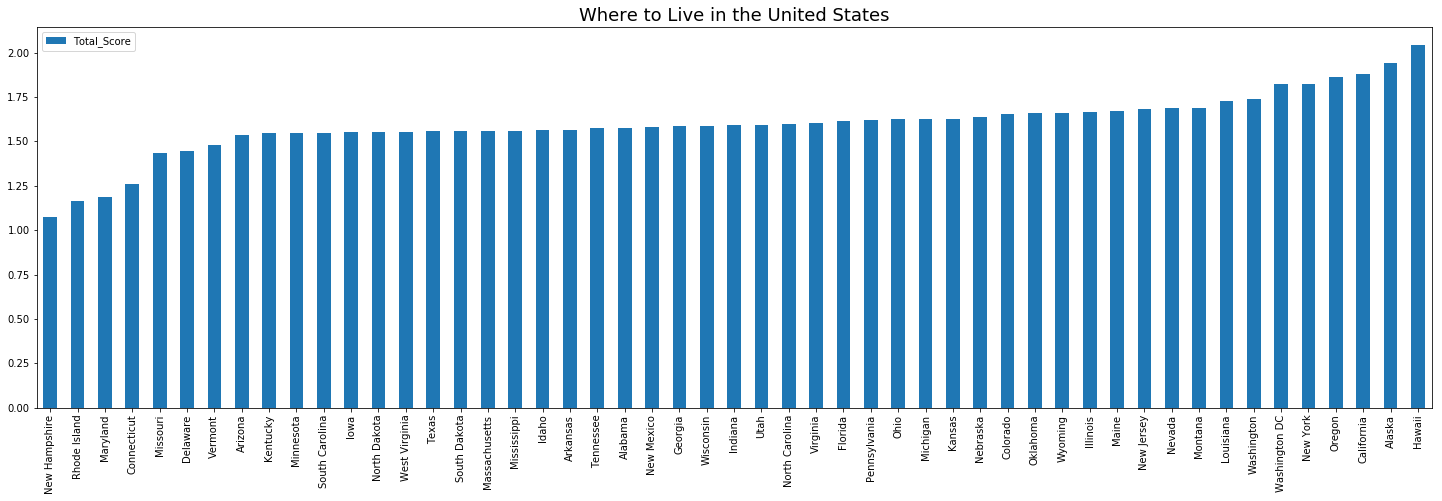

In [117]:
usa_cost_food_serial_total_only.plot(kind='bar',figsize=(25,7))
#plt.xticks(usa_cost_food_serial_total_only.index,usa_cost_food_serial_total_only["State"].values)
plt.title('Where to Live in the United States',fontsize=18)
plt.xlabel('')
plt.ylabel('')

plt.show()

## 5. Discussion

From the visualization of the total scores for each state, I can observe the following:
*  New Hampshire, Rhode Island, Maryland, and Connecticut have the lowest scores.  This means they have some combination of low cost of living, more food venues, and low possibility of encountering a serial killer.
*  Hawaii, Alaska, California, Oregon, New York, and Washington DC have the highest scores.  This means they have some combination of high cost of living, less food venues, and high possibility of encountering a serial killer.  However, it doesn't mean all variables apply to all states.  For example, Hawaii has the lowest probability of a serial killer encounter.  However, the cost of living there is by far the highest, which weighed heavily on its score.  Alaska and Washington DC, on the other hand, cover more of the variables.
*  A majority of the 50 states are very average.
*  The states with the lower scores (better) tend to be the smaller states, while the states with the higher scores (worse) tend to be the larger states (Hawaii and Washington DC are exceptions).

Based on my observations, here are my recommendations on where to live and where to avoid in the US:
*  New Hampshire has the lowest score.  It is cheaper and safer, relative to other states.  This is a good state to consider moving to.
*  Definitely do not move to Hawaii, as the cost of living there is insanely high.  It is very safe though.
*  I would also not move to Washington DC.  The numbers for that city alone is so high, it was broken out into its own separate location.  The actual state of Maryland itself scored very low and is a good place to consider moving to.
*  Definitely avoid Alaska, as it hits all three down sides: expensive, minimal food options, and also a serial killer hot spot.

## 6. Conclusion

The United States is a large country with many options of where to live.  Utilizing three variables (cost of living, food variety, and serial killer encounters), I built a ranking system which consider all three variables and provides a score for each state (and Washington DC).

I obtained cvs files from open sources (cost of living, US states coordinates, and serial killers) and utilized the Foursquare API to complete my analysis.  I took the results and created bar charts for better visualization.  Normalizing the data then allowed me to compare each state against another.

All of these steps lead me to the conclusion that New Hampshire, Rhode Island, Maryland, and Connecticut are states I recommend to consider moving to.  I also recommend avoiding Hawaii, Alaska, California, Oregon, New York, and Washington DC.
